# Linear Regression Sandbox

... and curve fitting more generally.

Welcome students, to our Curriculum Development exercise and experiment.  Data science is a new discipline comprised of many pre-existing ones.  Statistics came together with computer science, but also operations research and desktop publishing.  The data visualization side of the discipline owes a lot to Edward Tufte.

In [80]:
import numpy as np

Much of middle and high school algebra is obsessed with the paradigm linear equation $y = mx + b$ where $m$ is the slope of some line through (0, b) at the x-axis.  In statistics, the $m$ flips over to become a $w$ (weight) and the $b$ comes to mean "bias" (something you need to keep, not overcome).

The statistics community likes to use subscripted $b$ such as $b_{0}, b_{1}, b_{2}, b_{3}, b_{4} \dots$ for all the coefficients of the linear equation we're hoping to find (fit to the data), and then use as a predictor.

Tell me your features (e.g. how many bedrooms, bathrooms, floorspace...) and I'll predict the market value (good luck on that, without some location data).  I'll "weight" the features differently, i.e. some will "count more" than others.

In deep learning with so-called neural networks (only loosely based on the idea of actual neurons), a model may start with thousands upon thousands of randomly initialized weights, all awaiting micro-adjustments over millions of iterations.

A multi-variate Linear Regression model has a similar challenge:  to adjust weights so as to minimize some error function, ordinarily the sum of the 2nd powers of "residuals" i.e. the "squared distances" between actual and predicted values, all summed.  Minimize that sum to get the best model.  Adjust weights to accomplish this goal.

Your age is more of a predictor of medical condition Y than your haircolor.  Discovering the most critical features for prediction is an art in itself, given we must concern ourselves with practicality.  "Nice to have" measures may be too "pie in the sky" meaning we need to go with the measures we have, or at least have a realistic chance of somehow getting.

Does this mere difference in notational conventions explain why the $y = mx + b$ chapter was rarely seen as a segue to statistics more generally?  What middle school algebra books jumped from $y = mx + b$ to Linear Regression, we we might go:

$$
y[i] = b_{0} x_{0}[i] + b_{1} x_{1}[i] + b_{2}
$$

where $x_{0}$ and $x_{1}$ belong to the "feature vector" i.e. row $i$ of predictive variables used in linear combination with fixed coefficients (discovered through computation, i.e. "machine learning") $b_{0}$, $b_{1}$ and so on.


Think of $i$ (for index) as a row in a DataFrame.

That's a little bit more than a line driven by a single variable, $x$, but it's still a linear model.

Let's play...

In [81]:
# y = 3 * x0 - 5 * x1 + 15 where x0 and x1 are two features
b0 = 3
b1 = -5
b2 = 15
rng = np.random.default_rng(42)
x0 = rng.integers(30, size=20)  # feature
x1 = rng.integers(30, size=20)  # feature
y = 3 * x0 - 5 * x1 + 15

What we're doing above is working backwards from a known rule, coefficients preset, to see if our Linear Regression recipe is able to recover these coefficients from the data alone.  $x0$ and $x1$ are not dependent on each other, aside from both consisting of random integers between 0 and 29.  These values always determine the same $y$ given the linear relationship provided.

From the documentation, and example we'll be following rather closely:

```python
Examples
--------
>>> import numpy as np
>>> from sklearn.linear_model import LinearRegression
>>> X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
>>> # y = 1 * x_0 + 2 * x_1 + 3
>>> y = np.dot(X, np.array([1, 2])) + 3
>>> reg = LinearRegression().fit(X, y)
>>> reg.score(X, y)
1.0
>>> reg.coef_
array([1., 2.])
>>> reg.intercept_
3.0000...
>>> reg.predict(np.array([[3, 5]]))
array([16.])
```

In [82]:
from sklearn.linear_model import LinearRegression

In [83]:
inputs = np.column_stack((x0, x1))
inputs[:10]

array([[ 2, 15],
       [23, 11],
       [19,  5],
       [13, 27],
       [12, 23],
       [25, 19],
       [ 2, 12],
       [20, 24],
       [ 6, 16],
       [ 2, 13]])

In [84]:
output = np.dot(inputs, np.array([b0, b1])) + b2
model = LinearRegression().fit(inputs, output)

In [85]:
model.score(inputs, output)

1.0

In [86]:
model.coef_

array([ 3., -5.])

In [87]:
model.intercept_

15.00000000000001

Do we agree that LinearRegression is a smarty pants? :-D

### Exploring Tutorial Space, Notebook Open & Ready

Now that we're warmed up, lets sample some of what's already out there in Cyberia.  

"Learning how to learn" includes the technique of opening a fresh Notebook and following step by step tutorials.  Given a coding language is likely involved, there may be a "learning to read music" aspect to the activity.  

Have you tried to read Julia before?  In this Notebook, our kernel is Python.

You will find [Medium](http://medium.com) has become an important repository for all kinds of data science readings.  Consider contributing yourself.  I certainly use it a lot, including [to publish my own stories](https://medium.com/@kirbyurner).

#### Tutorial on Medium 

[*Linear Regression in Python with Pandas & Scikit-Learn*]((https://becominghuman.ai/linear-regression-in-python-with-pandas-scikit-learn-72574a2ec1a5))
Pranav Gupta Nov 25, 2018 · 6 min read

This tutorial dives right into Python and tackles typical issues of noisy data (what is it OK to drop and/or fill in?), and the need, sometimes, for one hot encoding to improve whatever model.  In this case the model is a Linear Regressor, first with one dependent variable, then with many.

[Tweeting my appreciation](https://twitter.com/4DsolutionsPDX/status/1258138571619405824) for the above tutorial -- another way to be a good netizen is to help curate and promote whatever you think might be useful to others.

In [88]:
URL = "https://openei.org/datasets/dataset/649aa6d3-2832-4978-bc6e-fa563568398e/resource/b710e97d-29c9-4ca5-8137-63b7cf447317/download/building1retail.csv"

In [89]:
import pandas as pd
import numpy as np
from scipy import stats
from datetime import datetime
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression # doesn't hurt to do this again
import matplotlib.pyplot as plt
%matplotlib inline

In [90]:
df = pd.read_csv(URL, index_col=[0], 
                 date_parser=lambda x: 
                 datetime.strptime(x, "%m/%d/%Y %H:%M"))
df.head()

,OAT (F),Power (kW)
Timestamp,,
2010-01-01 01:15:00,51,165.1
2010-01-01 01:30:00,51,151.6
2010-01-01 01:45:00,51,146.9
2010-01-01 02:00:00,51,153.7
2010-01-01 02:15:00,51,153.8


In [91]:
df.index

DatetimeIndex(['2010-01-01 01:15:00', '2010-01-01 01:30:00',
               '2010-01-01 01:45:00', '2010-01-01 02:00:00',
               '2010-01-01 02:15:00', '2010-01-01 02:30:00',
               '2010-01-01 02:45:00', '2010-01-01 03:00:00',
               '2010-01-01 03:15:00', '2010-01-01 03:30:00',
               ...
               '2010-12-30 21:45:00', '2010-12-30 22:00:00',
               '2010-12-30 22:15:00', '2010-12-30 22:30:00',
               '2010-12-30 22:45:00', '2010-12-30 23:00:00',
               '2010-12-30 23:15:00', '2010-12-30 23:30:00',
               '2010-12-30 23:45:00', '2010-12-31 00:00:00'],
              dtype='datetime64[ns]', name='Timestamp', length=34940, freq=None)

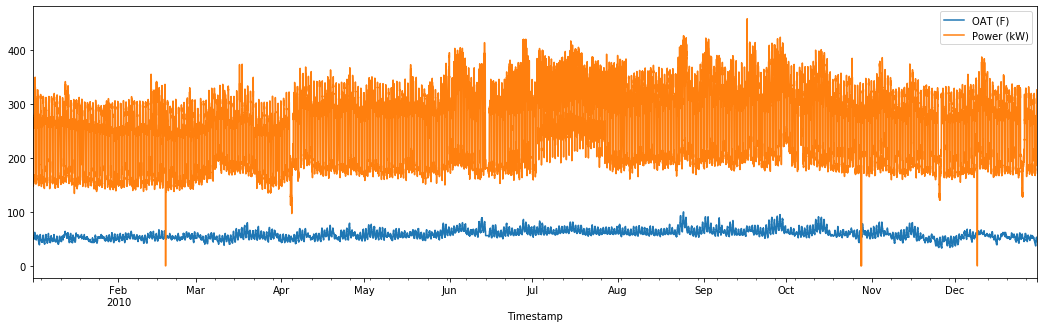

In [92]:
df.plot(figsize=(18,5));

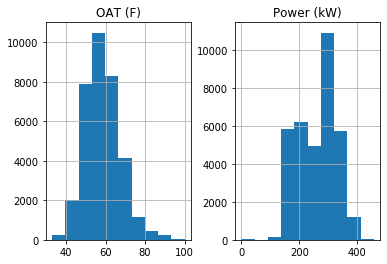

In [93]:
df.hist();

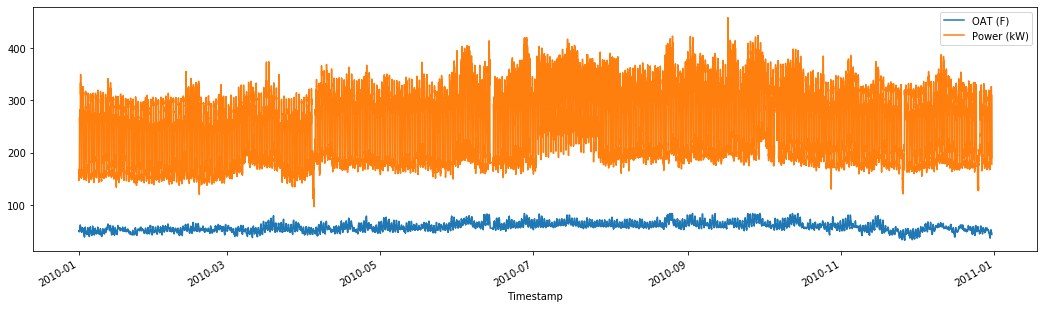

In [94]:
std_dev = 3
df = df[(np.abs(stats.zscore(df)) < float(std_dev)).all(axis=1)]
df.plot(figsize=(18,5));

In [95]:
df.isnull().values.any()

False

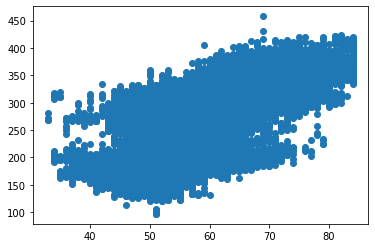

In [96]:
plt.scatter(df['OAT (F)'], df['Power (kW)']);

The tutorial we're following gives string dates as an argument to ```df.loc``` which fails to match the index datatype. A range of datetimes, of one day, accomplishes the intended isolation of a single day's temperature fluctuations.

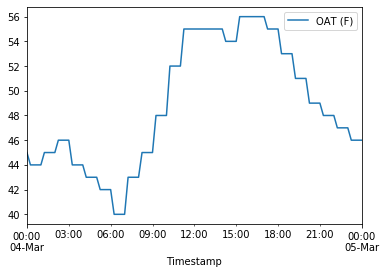

In [97]:
df.loc[datetime(2010, 3, 4):datetime(2010, 3, 5), ['OAT (F)']].plot();

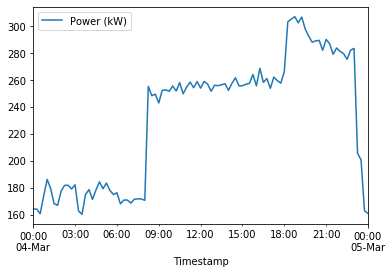

In [98]:
df.loc[datetime(2010, 3, 4):datetime(2010, 3, 5), ['Power (kW)']].plot();

How about we go with subplots and pair the two data sets?

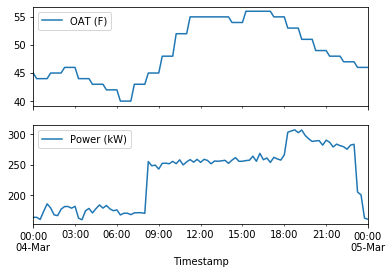

In [99]:
fig, axes = plt.subplots(2, 1, sharex = True)
df.loc[datetime(2010, 3, 4):datetime(2010, 3, 5), ['OAT (F)']].plot(ax=axes[0])
df.loc[datetime(2010, 3, 4):datetime(2010, 3, 5), ['Power (kW)']].plot(ax=axes[1]);

## Interacting with Widgets

Lets take a side trip away from Linear Regression, to discuss the generic topic of populating your Notebooks with wigets, meaning interactive devices such as sliders, text boxes, various kinds of picker.

When you manipulate a one of these devices, you trigger updates to the plots, based on changed inputs to whatever functions.

Extending Jupyter Notebooks and Labs with this interactive capability requires some work, but not a lot if everything goes smoothly:

```bash
jupyter nbextension enable --py widgetsnbextension
jupyter labextension install @jupyter-widgets/jupyterlab-manager
```

These widget capabilites work with multiple data visualization libraries.  You can use them with Bokeh for example.

Readings:

* [Interactive Controls in Jupyter Notebooks](https://towardsdatascience.com/interactive-controls-for-jupyter-notebooks-f5c94829aee6)
* [Adding Widgets in Bokeh](https://docs.bokeh.org/en/latest/docs/user_guide/interaction/widgets.html)

In [100]:
import ipywidgets as wg

In [101]:
print(wg.Widget.widget_types)

In [102]:
name = wg.Text(value="name")
age = wg.IntSlider(description="Age:")
display(name, age)

Text(value='name')

IntSlider(value=0, description='Age:')

In [159]:
print(name.value + " is " + str(age.value) + " years old.")

JOJO is 64 years old.


In [104]:
# ?? wg.DatePicker

In [105]:
dp = wg.DatePicker(
    description='Pick a Date:',
    disabled=False,
    value = datetime(2010, 3, 4)
)

def select_data(dt):
    fig, axes = plt.subplots(2, 1, sharex = True)
    # next_day = dt + pd.offsets.Day(1)
    df.loc[dt:dt+pd.offsets.Day(1), ['OAT (F)']].plot(ax=axes[0])
    df.loc[dt:dt+pd.offsets.Day(1), ['Power (kW)']].plot(ax=axes[1])
    
wg.interact(select_data, dt=dp);

interactive(children=(DatePicker(value=datetime.datetime(2010, 3, 4, 0, 0), description='Pick a Date:'), Outpu…

In [106]:
X = pd.DataFrame(df['OAT (F)'])
y = pd.DataFrame(df['Power (kW)'])
model = LinearRegression()
scores = []
kfold = KFold(n_splits=3, shuffle=True, random_state=42)
for i, (train, test) in enumerate(kfold.split(X, y)):
    model.fit(X.iloc[train,:], y.iloc[train,:])
    score = model.score(X.iloc[test,:], y.iloc[test,:])
    scores.append(score)
print(scores)

[0.38768927735902714, 0.3852220878090444, 0.3845165478148713]


In [107]:
model.coef_

array([[4.85534767]])

The scores were rather poor.  Given the high dependence on hour, and the fact that we haven't signaled that strongly in the data, but for making it a part of the Timestamp, the idea of [one hot encoding](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html) suggests itself.

In [108]:
data = pd.DataFrame({'color': ['blue', 'green', 'green', 'red']})
print(pd.get_dummies(data))

   color_blue  color_green  color_red
0           1            0          0
1           0            1          0
2           0            1          0
3           0            0          1


Time of day will get split across columns by the hour.

By this means, every hour will get a whole column in which to be "lit" (have a 1 value).  You'll see the transformation below.

In [109]:
X['tod'] = X.index.hour  
X.head(10)

,OAT (F),tod
Timestamp,,
2010-01-01 01:15:00,51,1
2010-01-01 01:30:00,51,1
2010-01-01 01:45:00,51,1
2010-01-01 02:00:00,51,2
2010-01-01 02:15:00,51,2
2010-01-01 02:30:00,51,2
2010-01-01 02:45:00,51,2
2010-01-01 03:00:00,51,3
2010-01-01 03:15:00,50,3


In [110]:
# drop_first = True removes multi-collinearity
add_var = pd.get_dummies(X['tod'], prefix='tod', drop_first=True)
# Add all the columns to the model data
X = X.join(add_var)
# Drop the original column that was expanded
X.drop(columns=['tod'], inplace=True)
print(X.tail())

                     OAT (F)  tod_1  tod_2  tod_3  tod_4  tod_5  tod_6  tod_7  \
Timestamp                                                                       
2010-12-30 23:00:00       47      0      0      0      0      0      0      0   
2010-12-30 23:15:00       44      0      0      0      0      0      0      0   
2010-12-30 23:30:00       44      0      0      0      0      0      0      0   
2010-12-30 23:45:00       44      0      0      0      0      0      0      0   
2010-12-31 00:00:00       44      0      0      0      0      0      0      0   

                     tod_8  tod_9  ...  tod_14  tod_15  tod_16  tod_17  \
Timestamp                          ...                                   
2010-12-30 23:00:00      0      0  ...       0       0       0       0   
2010-12-30 23:15:00      0      0  ...       0       0       0       0   
2010-12-30 23:30:00      0      0  ...       0       0       0       0   
2010-12-30 23:45:00      0      0  ...       0       0       0

What happens now though is ```LinearRegression``` will be seeking to fit many more inputs to the same output.  The number of weights (coefficients) will increase.  Check it out.

In [111]:
model = LinearRegression()
scores = []
kfold = KFold(n_splits=3, shuffle=True, random_state=42)
for i, (train, test) in enumerate(kfold.split(X, y)):
    model.fit(X.iloc[train,:], y.iloc[train,:])
    score = model.score(X.iloc[test,:], y.iloc[test,:])
    scores.append(score)
print(scores)

[0.8074246958895389, 0.8139449185141594, 0.8111379602960771]


In [112]:
# ? model

In [113]:
model.coef_

array([[  2.84733524,  -1.4079128 ,   1.39148437,   1.52916595,
          4.46107749,   5.98306453,   9.35043246,  16.34004074,
         77.81087427,  89.72250471,  87.20417047,  87.41000697,
         87.8538264 ,  87.05599413,  86.91327856,  86.83812843,
         87.01506715,  94.35208956, 102.45393288, 114.32509142,
        127.63477514, 130.30634935, 112.10935949,  44.65422443]])

In [114]:
model.intercept_

array([30.97976416])

In [115]:
model.predict(X.iloc[444].values.reshape(1, -1))

array([[283.14027519]])

In [116]:
y.iloc[444]

Power (kW)    268.6
Name: 2010-01-05 16:15:00, dtype: float64

OK, we got what we could from that tutorial.  Onward!

Next exhibit:  [Another Linear Regression Tutorial](https://realpython.com/linear-regression-in-python/)

This one has great overview before it ever starts with the Python.  The author helpfully puts Linear Regression agains the backdrop of Machine Learning, and introducing fitting a Polynomial in contrast, very helpful for nailing down what we mean by linear.

In [117]:
x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
y = np.array([5, 20, 14, 32, 22, 38])

In [118]:
y

array([ 5, 20, 14, 32, 22, 38])

In [119]:
model = LinearRegression()

In [120]:
model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [121]:
r_sq = model.score(x, y)

In [122]:
r_sq

0.7158756137479542

In [123]:
print('intercept:', model.intercept_)

intercept: 5.633333333333329


In [124]:
print('slope:', model.coef_)

slope: [0.54]


One of the readers complete the tutorial and [saved it on Github](https://gist.github.com/vlad-bezden/9533b764034d19d7d8f186d6fbea0750), in a form ready to use in the cloud with Google's Collab (like MyBinder).

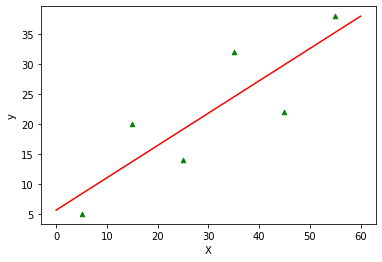

In [125]:
fig = plt.Figure(figsize=(15,15))
ax1 = plt.subplot('111')
data = pd.DataFrame({"X":x.flatten(), "y":y})
ax1 = data.plot("X", "y", kind="scatter", marker="^", c='green', ax=ax1)
domain = np.linspace(0, 60, 50)
line = (model.coef_[0] * domain) + model.intercept_
ax1.plot(domain, line, '-r');

# Roller coasters!



In [126]:
coasters = pd.read_csv("./data/roller_coasters.csv")

In [127]:
coasters.head()

,Name,Park,State,Country,Duration,Speed,Height,drop,Length,Yr Opened,Inversions
0,Top Thrill Dragster,Cedar Point,Ohio,USA,60,120.0,420.0,400.0,2800.0,2003,0
1,Superman The Escape,Six Flags Magic Mountain,California,USA,28,100.0,415.0,328.1,1235.0,1997,0
2,Millennium Force,Cedar Point,Ohio,USA,165,93.0,310.0,300.0,6595.0,2000,0
3,Goliath,Six Flags Magic Mountain,California,USA,180,85.0,235.0,255.0,4500.0,2000,0
4,Titan,Six Flags Over Texas,Texas,USA,210,85.0,245.0,255.0,5312.0,2001,0


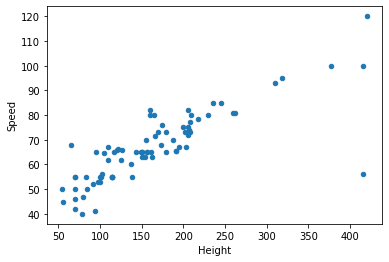

In [128]:
coasters.plot("Height", "Speed", kind="scatter");

In [129]:
X = pd.DataFrame(coasters['Height'])
y = pd.DataFrame(coasters['Speed'])
model = LinearRegression()
scores = []
kfold = KFold(n_splits=3, shuffle=True, random_state=42)
for i, (train, test) in enumerate(kfold.split(X, y)):
    model.fit(X.iloc[train,:], y.iloc[train,:])
    score = model.score(X.iloc[test,:], y.iloc[test,:])
    scores.append(score)
print(scores)

[0.7501836893633037, -0.09335749434098739, 0.8294942773201045]


In [130]:
model.coef_

array([[0.14043416]])

In [131]:
model.intercept_

array([43.68192597])

In [132]:
y.loc[0]
pd.concat([X, y], axis=1)
min(X['Height'])

55.0

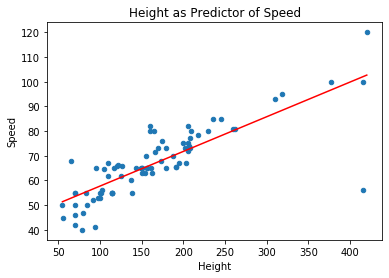

In [133]:
fig = plt.Figure(figsize=(15,15))
ax1 = plt.subplot('111')
plt.title("Height as Predictor of Speed")
data = pd.concat([X, y], axis=1)
ax1 = coasters.plot("Height", "Speed", kind="scatter", ax=ax1);
domain = np.linspace(min(X['Height']), max(X['Height']), 50)
line = (model.coef_[0] * domain) + model.intercept_
ax1.plot(domain, line, '-r');

Lets do it again use ```statsmodels```.

In [134]:
import statsmodels.api as sm

In [135]:
X = sm.add_constant(X)
X

,const,Height
0,1.0,420.0
1,1.0,415.0
2,1.0,310.0
3,1.0,235.0
4,1.0,245.0
...,...,...
75,1.0,65.0
76,1.0,191.6
77,1.0,137.8
78,1.0,102.0


In [136]:
model = sm.OLS(y, X)

In [137]:
results = model.fit()

In [138]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Speed   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     158.3
Date:                Mon, 11 May 2020   Prob (F-statistic):           1.85e-20
Time:                        20:38:31   Log-Likelihood:                -281.14
No. Observations:                  80   AIC:                             566.3
Df Residuals:                      78   BIC:                             571.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         43.1364      2.091     20.634      0.0

[Simple and Linear Regression in Python](https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9) gives more pointers as to how to interpret the above table.

### LAB IDEAS  

Eliminate the one or two main outliers in the roller coaster data inputs, and see how this affects $R^{2}$ and so on.

Replot without the outliers.

In [139]:
coasters[coasters.Height > 400].loc[:,["Name", "Park", "Height", "Speed"]]

,Name,Park,Height,Speed
0,Top Thrill Dragster,Cedar Point,420.0,120.0
1,Superman The Escape,Six Flags Magic Mountain,415.0,100.0
79,Wild Beast,Paramount Canada's Wonderland,415.0,56.0


In [140]:
purged = coasters[coasters.Name != "Wild Beast"]
purged.head()

,Name,Park,State,Country,Duration,Speed,Height,drop,Length,Yr Opened,Inversions
0,Top Thrill Dragster,Cedar Point,Ohio,USA,60,120.0,420.0,400.0,2800.0,2003,0
1,Superman The Escape,Six Flags Magic Mountain,California,USA,28,100.0,415.0,328.1,1235.0,1997,0
2,Millennium Force,Cedar Point,Ohio,USA,165,93.0,310.0,300.0,6595.0,2000,0
3,Goliath,Six Flags Magic Mountain,California,USA,180,85.0,235.0,255.0,4500.0,2000,0
4,Titan,Six Flags Over Texas,Texas,USA,210,85.0,245.0,255.0,5312.0,2001,0


In [141]:
X = pd.DataFrame(purged['Height'])
y = pd.DataFrame(purged['Speed'])
X = sm.add_constant(X)  # to add intercept term y = b0 + b1 X
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Speed   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     376.1
Date:                Mon, 11 May 2020   Prob (F-statistic):           2.30e-31
Time:                        20:38:31   Log-Likelihood:                -251.60
No. Observations:                  79   AIC:                             507.2
Df Residuals:                      77   BIC:                             511.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.4242      1.565     25.192      0.0

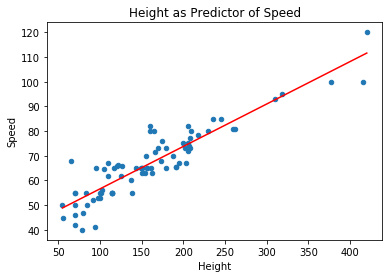

In [142]:
fig = plt.Figure(figsize=(15,15))
ax1 = plt.subplot('111')
plt.title("Height as Predictor of Speed")
data = pd.concat([X, y], axis=1)
ax1 = purged.plot("Height", "Speed", kind="scatter", ax=ax1);
domain = np.linspace(min(X['Height']), max(X['Height']), 50)
line = (0.1718 * domain) + 39.4242
ax1.plot(domain, line, '-r');

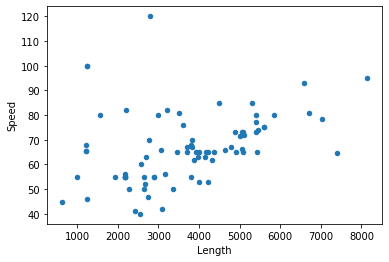

In [143]:
coasters.plot("Length", "Speed", kind="scatter");

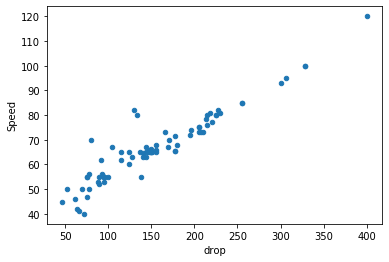

In [144]:
coasters.plot("drop", "Speed", kind="scatter");

In [145]:
X = coasters.loc[:,["drop"]]

In [146]:
X

,drop
0,400.00
1,328.10
2,300.00
3,255.00
4,255.00
...,...
75,180.00
76,177.00
77,124.67
78,93.00


In [147]:
y = pd.DataFrame(coasters['Speed'])
model = LinearRegression()
scores = []
kfold = KFold(n_splits=3, shuffle=True, random_state=42)
for i, (train, test) in enumerate(kfold.split(X, y)):
    model.fit(X.iloc[train,:], y.iloc[train,:])
    score = model.score(X.iloc[test,:], y.iloc[test,:])
    scores.append(score)
print(scores)

[0.9424791887488967, 0.7120225191057105, 0.8748915355653138]


In [148]:
model.coef_, model.intercept_

(array([[0.19283169]]), array([37.12035244]))

In [149]:
X = coasters.loc[:,["drop", "Height"]]
X

,drop,Height
0,400.00,420.0
1,328.10,415.0
2,300.00,310.0
3,255.00,235.0
4,255.00,245.0
...,...,...
75,180.00,65.0
76,177.00,191.6
77,124.67,137.8
78,93.00,102.0


In [150]:
model = LinearRegression()
scores = []
kfold = KFold(n_splits=3, shuffle=True, random_state=42)
for i, (train, test) in enumerate(kfold.split(X, y)):
    model.fit(X.iloc[train,:], y.iloc[train,:])
    score = model.score(X.iloc[test,:], y.iloc[test,:])
    scores.append(score)
print(scores)

[0.9466735269473453, 0.7502732253479295, 0.8845544943694605]


In [151]:
model.coef_

array([[0.16994844, 0.02693056]])

In [152]:
model.intercept_

array([36.20549843])

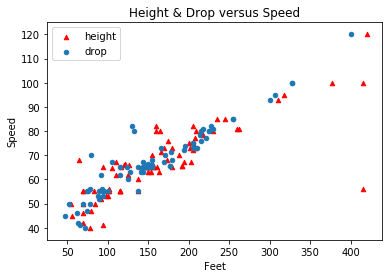

In [153]:
ax1 = coasters.plot("Height", "Speed", color="red", 
                    kind="scatter", label="height", marker="^")
coasters.plot("drop", "Speed", kind="scatter", label="drop", ax=ax1)
plt.xlabel("Feet")
plt.title("Height & Drop versus Speed")
plt.legend();

In [154]:
coasters["predicted_speed"] = (model.coef_[0][0] * X["drop"] 
            + model.coef_[0][1] * X["Height"] 
            + model.intercept_)

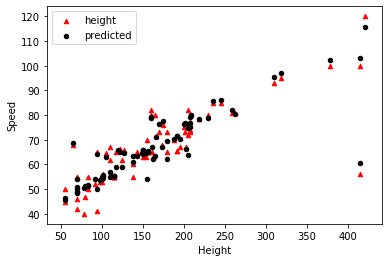

In [155]:
ax1 = coasters.plot("Height", "Speed", color="red", 
                    kind="scatter", label="height", marker="^")

coasters.plot("Height", "predicted_speed", 
              kind="scatter", label="predicted", 
              color = "black",
              ax=ax1)

plt.ylabel("Speed")
plt.legend();

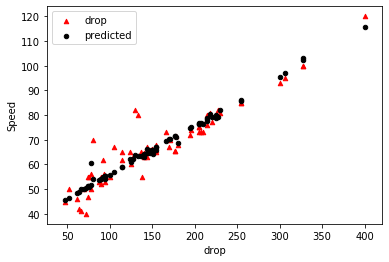

In [156]:
ax1 = coasters.plot("drop", "Speed", color="red", 
                    kind="scatter", label="drop", marker="^")

coasters.plot("drop", "predicted_speed", 
              kind="scatter", label="predicted", 
              color = "black",
              ax=ax1)
plt.ylabel("Speed")
plt.legend();

In [157]:
coasters.loc[:,["Name", "Park", "Height", "drop", "Speed", "predicted_speed"]]

,Name,Park,Height,drop,Speed,predicted_speed
0,Top Thrill Dragster,Cedar Point,420.0,400.00,120.0,115.495707
1,Superman The Escape,Six Flags Magic Mountain,415.0,328.10,100.0,103.141762
2,Millennium Force,Cedar Point,310.0,300.00,93.0,95.538502
3,Goliath,Six Flags Magic Mountain,235.0,255.00,85.0,85.871031
4,Titan,Six Flags Over Texas,245.0,255.00,85.0,86.140336
...,...,...,...,...,...,...
75,Oblivion,Alton Towers,65.0,180.00,68.0,68.546703
76,Stunt Fall,Warner Bros. Movie World,191.6,177.00,65.6,71.446266
77,Hayabusa,Tokyo SummerLand,137.8,124.67,60.3,61.104001
78,Top Gun,Paramount Canada's Wonderland,102.0,93.00,56.0,54.757620
